In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
DATADIR = 'data'

In [3]:
df_mont = pd.read_csv(f'{DATADIR}/smp-montvu-pp.csv', index_col=[0])
df_sold = pd.read_csv(f'{DATADIR}/smp-sold-pp.csv', index_col=[0])
df_pint = pd.read_csv(f'{DATADIR}/smp-pint-pp.csv', index_col=[0])

dfs = [df_mont, df_sold, df_pint]

In [4]:
def compute_duration(df, log=False):
    df['start'] = pd.to_datetime(df['start'])
    df['end'] = pd.to_datetime(df['end'])
    df['duration'] = df.end - df.start
    if log == True:
        df['dursec'] = np.log(df['duration'].dt.total_seconds())
    else:
        df['dursec'] = df['duration'].dt.total_seconds()
    return df

In [5]:
def normalize(df, col: str):
    return df[np.abs(stats.zscore(df[col].dt.total_seconds()))<3]

In [9]:
def violin_plot(df, col:str, color:str):
    return sns.violinplot(x=df[col], orient='v', inner = "quartile", color=color)
    #x = df[col].dt.total_seconds()
    #ax = sns.violinplot(x=x)

/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Outliers removed: 0


/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Outliers removed: 35
Outliers removed: 13


/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


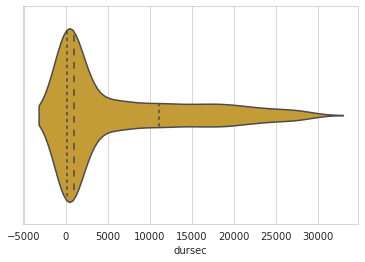

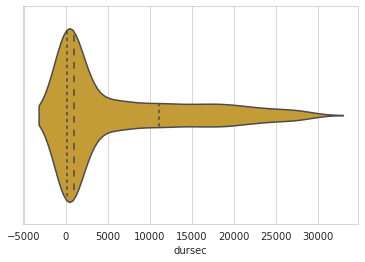

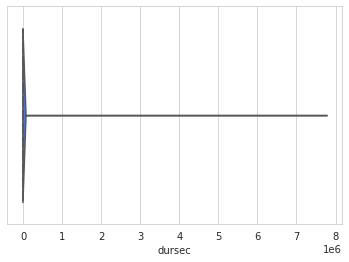

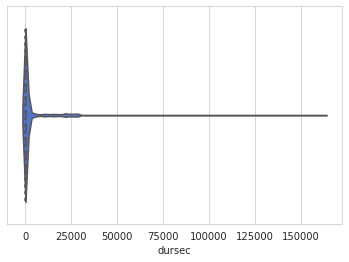

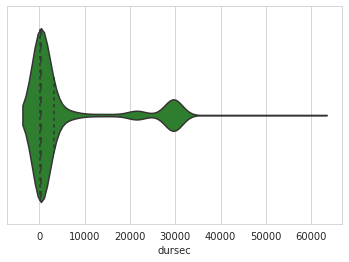

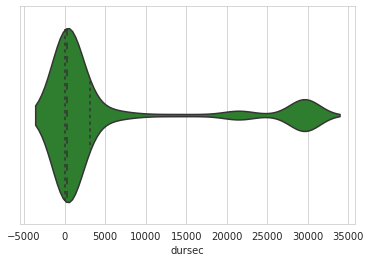

In [10]:
import matplotlib.pyplot as plt

colors = ['goldenrod', 'royalblue', 'forestgreen']
sns.set_style("whitegrid")

for i, df in enumerate(dfs):
    # Old length
    old_len = len(df)
    
    # Calculate values for new df
    df = compute_duration(df, log=False)
    
    #New figure
    plt.figure()
    
    # Old plot
    violin_plot(df, 'dursec', colors[i])
    
    # Remove outliers
    df = normalize(df, 'duration')
    
    # New length and final length
    new_len = len(df)
    final_len = old_len - new_len
    
    # New plot
    plt.figure()
    violin_plot(df, 'dursec', colors[i])
    
    print(f'Outliers removed: {final_len}')

In [21]:
df = pd.concat(dfs, sort=False)

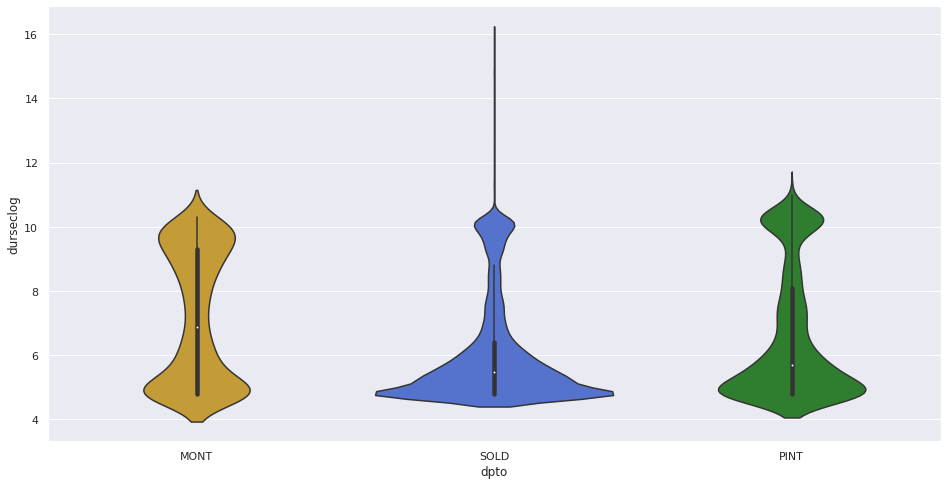

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})
#ax = sns.violinplot(x=df['durseconds'])
df['durseclog'] = np.log(df['dursec'])
ax = sns.violinplot(x="dpto", y="durseclog", data=df, palette=colors)

In [23]:
df.index = pd.to_datetime(df.start)
#df.set_index('start', inplace=True)

In [24]:
df

,dpto,zone,start,end,duration,dursec,durseclog
start,,,,,,,
2021-01-18 12:34:00,MONT,140,2021-01-18 12:34:00,2021-01-18 12:36:00,0 days 00:02:00,120.0,4.787492
2021-01-18 09:55:00,MONT,128,2021-01-18 09:55:00,2021-01-18 09:57:00,0 days 00:02:00,120.0,4.787492
2021-01-18 08:47:00,MONT,102,2021-01-18 08:47:00,2021-01-18 08:54:00,0 days 00:07:00,420.0,6.040255
2021-01-18 08:36:00,MONT,102,2021-01-18 08:36:00,2021-01-18 08:38:00,0 days 00:02:00,120.0,4.787492
2021-01-15 11:01:00,MONT,122,2021-01-15 11:01:00,2021-01-15 11:03:00,0 days 00:02:00,120.0,4.787492
...,...,...,...,...,...,...,...
2020-01-01 06:00:00,PINT,3303 - CAB_BARNIZ,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449
2020-01-01 06:00:00,PINT,3301 - CA_APRESTO,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449
2020-01-01 06:00:00,PINT,3302 - CAB_BASE,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449


In [30]:
df = df.loc['2020-05-01':'2021-01-01']

<ipython-input-30-1c8f501b2bbd>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['2020-05-01':'2021-01-01']


In [31]:
dptos = ['MONT', 'SOLD', 'PINT']

In [32]:
df

,dpto,zone,start,end,duration,dursec,durseclog
start,,,,,,,
2020-12-30 13:28:00,MONT,111,2020-12-30 13:28:00,2020-12-30 13:30:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:19:00,MONT,141,2020-12-30 13:19:00,2020-12-30 13:21:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:17:00,MONT,140,2020-12-30 13:17:00,2020-12-30 13:19:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:16:00,MONT,138,2020-12-30 13:16:00,2020-12-30 13:25:00,0 days 00:09:00,540.0,6.291569
2020-12-30 09:45:00,MONT,122,2020-12-30 09:45:00,2020-12-30 09:47:00,0 days 00:02:00,120.0,4.787492
...,...,...,...,...,...,...,...
2020-06-01 07:48:00,PINT,3201 - B.MANUT_Z1,2020-06-01 07:48:00,2020-06-01 08:02:00,0 days 00:14:00,840.0,6.733402
2020-06-01 07:09:00,PINT,3301 - CA_APRESTO,2020-06-01 07:09:00,2020-06-01 07:11:00,0 days 00:02:00,120.0,4.787492
2020-06-01 06:23:00,PINT,3203 - B.MANUT_Z3,2020-06-01 06:23:00,2020-06-01 06:31:00,0 days 00:08:00,480.0,6.173786


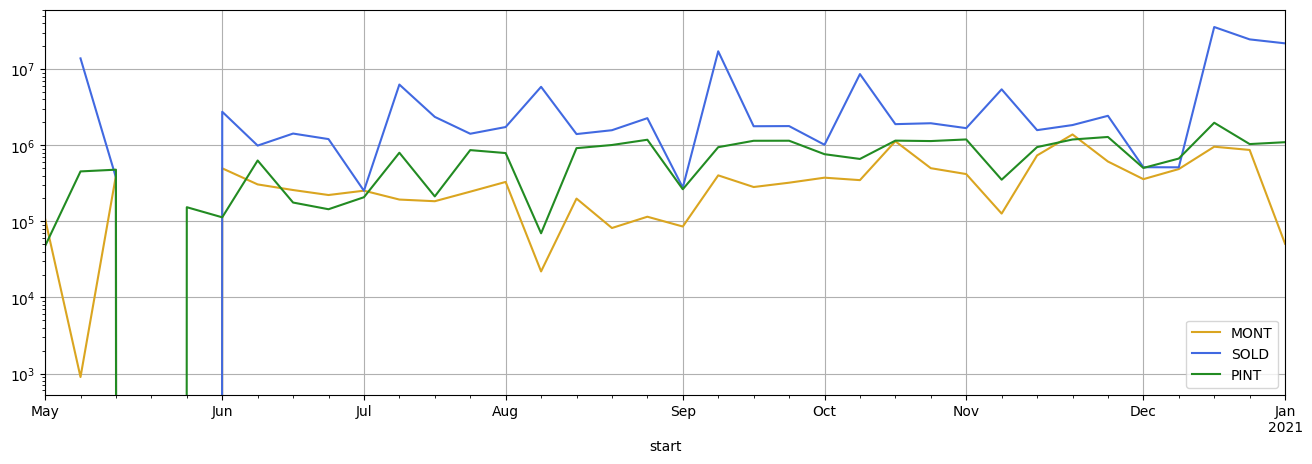

In [45]:

plt.style.use('default')

for i, dpto in enumerate(dptos):
    df[df.dpto==f'{dpto}'].resample('W').sum()['dursec'].plot(logy=True, figsize=(16,5), label=f'{dpto}', legend=True, color=colors[i], grid=True)
    #df[df.dpto=='PINT'].resample('W').sum()['duration'].plot()
    #df[df.dpto=='MONT'].resample('W').sum()['duration'].plot()